## Household Contact

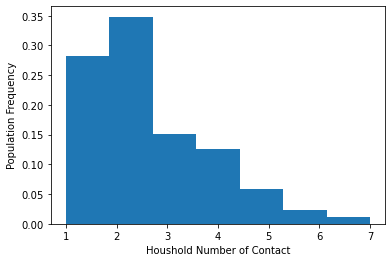

In [16]:
import matplotlib.pyplot as plt
a= [1,2,3,4,5,6,7]
b= [0.2818, 0.3483, 0.1505, 0.1266, 0.058, 0.0227, 0.012]
plt.hist(a,7, weights=b)
plt.xlabel('Houshold Number of Contact')
plt.ylabel('Population Frequency')
plt.show()

## Non-household Contact (Poisson)

Network Distribution of Poisson Distribution


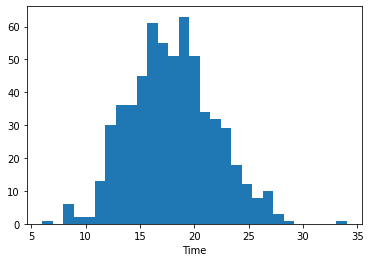

In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
N = 600 # size of the network
lam = 18 # Poisson parameter
### Note you can put any distribution you want here for the sequence, we can try some different things here
sequence = np.random.poisson(lam, N) # N.B the sum of this must be an even number, regenerate if not
while np.mod(np.sum(sequence),2) != 0:
    sequence = np.random.poisson(lam, N)
#print(sequence)
G = nx.configuration_model(sequence)
len(G)
actual_degrees = [d for v, d in G.degree()]
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

def plot_degree_dist(G): # to produce the degree node distribution of a graph
    num_nodes = len(G.nodes())
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,5+int(np.floor(np.sqrt(num_nodes))))
    plt.xlabel("Time")
    plt.ylabel("")
    plt.show()
print('Network Distribution of Poisson Distribution')
plot_degree_dist(G)  

## Non-household Contact (Power Law)

Network Distribution of Power Law Distribution


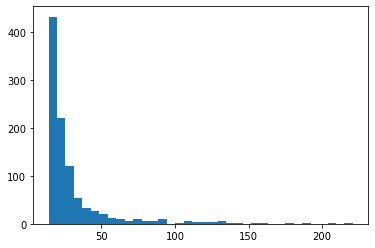

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import time
import numpy.random as ra
from numpy import linalg as LA # needed to compute eigenvalues, call w1, v1 = LA.eig(S_con1), w1 has the eigenvalues
import scipy.stats as stats

def plot_degree_dist(G): # to produce the degree node distribution of a graph
    num_nodes = len(G.nodes())
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,5+int(np.floor(np.sqrt(num_nodes))))
    plt.show()

N = 1000
G = nx.powerlaw_cluster_graph(N, 15, 0.1)
figure() 
print('Network Distribution of Power Law Distribution')
plot_degree_dist(G)
#print(np.sum(nx.adjacency_matrix(G))/N)
#print(nx.adjacency_matrix(G))
G = nx.to_numpy_matrix(G)
